# Лабораторная работа №2. Дискриминантный анализ.


### 1. Подготовка библиотек
Импортируем необходимые библиотеки:

In [21]:
import numpy as np # поддерживает матрицы, массивы, мат.функции для них
import pandas as pd # библиотека для анализа данных
from scipy.stats import f
from scipy.spatial.distance import mahalanobis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 2. Преддискриминантный этап анализа
Целью дискриминантного анализа является разделение рассматриваемой совокупности объектов или явлений на заданные обучающими выборками классы. Исходные данные для анализа представлены в виде матрицы.

Есть два способа создания тренировочной выборки - с помощью списка TRAIN_SAMPLES или заполнение вручную стобца в Excel-файле.

In [22]:
_ = \
"""
    Что поменять:
        0) названия файлов, для считывания и для записи(этот в самом конце)
        1) FEATURES
        2) задать TRAIN_SAMPLES, если не задается, то удалить параметр из вызова функции gen_train_data
        3) задать F to enter в sda
"""

In [23]:
# В переменную FEATURES записываем названия показателей
FEATURES = ["Население","ОК(кроме 6001) Возм. не представлено (объем)","ОК(кроме 6001) Возм. не представлено (кол-во)","Расходные операции 6001(кол-во)","Приходные операции 6001(кол-во)","Расходные операции 6001","Доли выв. ДС в заруб. банки","Кол-во риск-ориентировок запросы","Кол-во проверок","КВО 4005 Всего (объем)","КВО 4005 Всего (кол-во)","ВК (6001) Всего (объем)","ВК (6001) Всего (кол-во)","Приходные операции 6001","05 Доли сомнительных операций","Общий объем опер.90дн.","Общее кол-во опер.90дн.","ВК (6001) Всего (объем)90дн.","Общий объем опер.30дн.","ВК (6001) Всего (кол-во)90дн.","Общее кол-во опер.30дн.","09 Доли возм. не представленных сообщений","08 Доли кол-во КВО 5007 возм. не предст. сообщений","КВО 5007 Всего (кол-во)","КВО 5007 Всего (объем)","КВО 5007 Возм. не представлено (объем)","07 Доли объема возм. не предст. сообщений по ВК","КВО 5007 Возм. не представлено (кол-во)","06 Доли объема возм. не предст. сообщений по ОК","03 Доли выв. ДС в заруб. банки(без оффш.)","04 Доли выв. ДС в оффшор. банки","02 Доли опер. обналич","01 Доли опер. с фиктивными","КВО 4007 Всего (кол-во)","КВО 4007 Всего (объем)","КВО 4007 Возм. не представлено (объем)","КВО 4007 Возм. не представлено (кол-во)","ВК(6001) Возм. не представлено (объем)","ВК(6001) Возм. не представлено (кол-во)","Сообщения объем 4077 (3041)","Сообщения кол-во 4077 (3041)","Приход/расход 6001","Приход/расход","Снятие наличных денежных средств","Сомнительные операции","Перечисления со счетов оффшорных банков","Перечисления со счетов зарубежных банков","Перечисления на счета в оффшорных банках","Перечисления на счета в зарубежных банках(без оффш.)","Перечисления на счета в зарубежных банках","Операции с организациями, имеющими признаки фиктивности(кол-во)","Операции с организациями, имеющими признаки фиктивности","Общий объем операций 6001","ВК(6001) Всего (кол-во)","ВК(6001) Всего (объем)","Общий объем операций (руб.)","Общее кол-во операций 6001","Общее кол-во операций","Обороты за отчетный период по кредиту «итого», тыс.руб.;счета Депо – в штуках","Сотня по активам","Общий объем операций с бюдж. орг.","Обороты за отчетный период по дебету «итого», тыс.руб.;счета Депо – в штуках","Кол-во юр. лиц","Кол-во фиктивности  юр. лиц","Кол-во физ. лиц","Кол-во получ. бюджетных средств","Кол-во не опоз. юл/фл","Кол-во клиентов-нерезидентов","Доли фиктивности  юр. лиц","Кол-во клиентов есть счет","Кол-во клиентов","Доли клиентов физ. лиц","Доли клиентов юр. лиц","Доли  клиентов-нерезидентов"] 


In [25]:
data = pd.read_excel('C:/Users/zheny/Desktop/УИР/Данные УИР.xlsx',0)
data.head()

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов,Train sample
0,12263861,280074328480,18766,11492,21298,20183270043,6.863105,1,0,52373287768,...,25,56,396,7.448889,18304,19261,39.171766,61.461976,2.163462,0.0
1,5208690,157537353,205,223,114,169231559,0.000000,0,0,1623086106,...,0,0,1,7.171315,277,304,9.386282,90.613718,0.361011,0.0
2,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,0.0
3,12263861,8123066430,994,487,360,529987788,0.222585,0,0,879015244,...,12,3,5,8.755130,812,854,10.344828,90.024631,0.615764,0.0
4,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,24,24,37.500000,62.500000,0.000000,1.0


Создаем новую переменную, в которую будем записывать все данные, которые необходимо включить в итоговый Excel-файл.

In [26]:
data_to_excel = data[FEATURES]

Далее, вводим функцию gen_train_data по созданию тренировочной выборки.
<br>Аргументы функции: 
- data - данные для анализа
- features - названия признаков 
- train_samples - опциональный параметр: если он передан, то разбиение классов обучающей выборкой задается при помощи train_samples (1 часть ЛР), в противном случае разбиение должно присутствовать в одном из столбцов data (2 часть ЛР)

In [27]:
def gen_train_data(data, features, train_samples=None):
    if train_samples: # если опциональный параметр задан
        train_data = pd.DataFrame() # создаем тренировочную выборку, пока пустую
        for cls, samples in train_samples.items(): # в cls записываем номера классов, в samples список объектов этого класса
            train_samps = data[features].loc[samples] # выбираем объекты обучающей выборки
            train_samps["Class"] = cls # добавляем к ним колонку с номером класса
            train_data = pd.concat([train_data, train_samps]) # concat - функция объединения таблиц
    else:
        assert data.shape[1] == len(features) + 1 # если в исходном файле нет доп.колонки с разбиением, выдаст ошибку
        train_data = data.dropna() # берем в тренировочную выборку только те строки, где проставлены классы
        cls_col = train_data.drop(columns=features).columns[0] 
        train_data = train_data.rename({cls_col: "Class"}, axis=1) # переименовываем колонку с обучающей выборкой на  "Class"
    train_data = train_data.astype({"Class": 'int32'}) # присваем колонке "Class" тип int
    return train_data

In [28]:
# если классы заданы в файле - TRAIN_SAMPLES надо удалить
train_data = gen_train_data(data, FEATURES)
train_data.head(5) # смотрим результаты работы функции gen_train_data

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов,Class
0,12263861,280074328480,18766,11492,21298,20183270043,6.863105,1,0,52373287768,...,25,56,396,7.448889,18304,19261,39.171766,61.461976,2.163462,0
1,5208690,157537353,205,223,114,169231559,0.000000,0,0,1623086106,...,0,0,1,7.171315,277,304,9.386282,90.613718,0.361011,0
2,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,0
3,12263861,8123066430,994,487,360,529987788,0.222585,0,0,879015244,...,12,3,5,8.755130,812,854,10.344828,90.024631,0.615764,0
4,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,24,24,37.500000,62.500000,0.000000,1


Добавим столбец с обучающей выборкой в переменную.

In [29]:
data_to_excel["Train sample"] = train_data.Class

Для расчета Лямбды Уилкса необходимо знать: <br>
1) общая матрица рассеяния: 
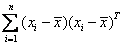

2) внутриклассовые матрицы разброса
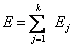

где 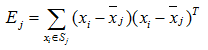

In [30]:
# проведем расчет матрицы рассеяния 

def scatter_matrix(samples):
    if isinstance(samples, pd.Series):
        samples = samples.to_frame()
    d = samples - samples.mean()
    res = np.zeros((d.shape[1], d.shape[1]))
    for _, row in d.iterrows():
        col = row.to_frame()
        res += np.dot(col,col.T)
    return res

In [31]:
# проведем расчет внутриклассовых матриц разброса

def classes_scatter_matrix(samples, labels):
    A = np.zeros((samples.shape[1], samples.shape[1]))
    for cls in labels.unique():
        A += scatter_matrix(samples[labels == cls])
    return A

Рассчитаем ковариационную матрицу:

In [32]:
# выведем ковариационную матрицу
# она рассчитывается как классовая матрица рассеяния "classes_scatter_matrix", деленная на (кол-во объектов - кол-во классов)

cov = pd.DataFrame(
    classes_scatter_matrix(train_data[FEATURES], train_data.Class) / (train_data.shape[0] - train_data.Class.unique().size), 
    index=FEATURES, 
    columns=FEATURES
)

cov

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во физ. лиц,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов
Население,2.066566e+13,3.699776e+16,1.775358e+09,-2.602213e+09,-8.021211e+08,-3.800762e+15,2.265817e+05,7.643167e+04,-3.348460e+05,6.049860e+15,...,7.424228e+08,5.422623e+06,5.032449e+06,4.376576e+07,-1.370455e+07,6.593452e+08,-1.172780e+09,6.825777e+06,-7.789353e+07,-1.572463e+06
ОК(кроме 6001) Возм. не представлено (объем),3.699776e+16,2.873029e+21,1.906742e+14,1.104482e+14,2.111901e+14,1.917465e+20,6.891484e+10,7.732133e+09,-7.081066e+08,5.348115e+20,...,7.322486e+13,2.259576e+11,5.656506e+11,4.021334e+12,9.981354e+09,1.840658e+14,1.898734e+14,1.569468e+11,1.715544e+11,1.463290e+10
ОК(кроме 6001) Возм. не представлено (кол-во),1.775358e+09,1.906742e+14,1.284874e+07,7.791088e+06,1.417283e+07,1.318157e+13,4.597311e+03,5.709615e+02,4.889423e+00,3.570496e+13,...,4.879166e+06,1.580704e+04,3.822782e+04,2.669371e+05,2.270644e+03,1.258078e+07,1.301419e+07,7.202228e+03,2.269826e+04,9.906976e+02
Расходные операции 6001(кол-во),-2.602213e+09,1.104482e+14,7.791088e+06,8.562505e+06,1.163868e+07,1.483018e+13,2.937931e+03,2.365641e+02,7.774519e+01,2.101234e+13,...,2.890421e+06,8.862304e+03,2.563150e+04,1.548430e+05,1.286694e+04,8.172630e+06,8.822554e+06,-4.286353e+03,5.308604e+04,4.182363e+02
Приходные операции 6001(кол-во),-8.021211e+08,2.111901e+14,1.417283e+07,1.163868e+07,1.906160e+07,2.107524e+13,5.368801e+03,4.635769e+02,-2.790865e+01,3.936283e+13,...,5.438268e+06,1.609042e+04,4.408303e+04,2.977157e+05,1.190425e+04,1.405038e+07,1.505137e+07,5.358586e+03,4.548054e+04,9.910590e+02
Расходные операции 6001,-3.800762e+15,1.917465e+20,1.318157e+13,1.483018e+13,2.107524e+13,2.738844e+19,5.135128e+09,4.260073e+08,-6.723750e+07,3.602066e+19,...,4.968272e+12,1.477584e+10,4.401167e+10,2.704806e+11,2.406954e+10,1.353273e+13,1.438094e+13,-7.569860e+09,8.748434e+10,6.420408e+08
Доли выв. ДС в заруб. банки,2.265817e+05,6.891484e+10,4.597311e+03,2.937931e+03,5.368801e+03,5.135128e+09,1.771455e+00,1.377233e-01,2.443754e-02,1.290860e+10,...,1.768341e+03,5.288180e+00,1.352898e+01,9.722331e+01,1.630732e+00,4.482178e+03,4.807904e+03,2.950634e+00,8.099921e+00,3.985834e-01
Кол-во риск-ориентировок запросы,7.643167e+04,7.732133e+09,5.709615e+02,2.365641e+02,4.635769e+02,4.260073e+08,1.377233e-01,2.820513e-01,-1.227650e-17,1.571524e+09,...,2.009487e+02,2.397436e+00,1.858974e+00,1.046154e+01,2.026279e+00,6.008718e+02,5.582692e+02,-1.889515e+00,9.620529e+00,-5.451661e-05
Кол-во проверок,-3.348460e+05,-7.081066e+08,4.889423e+00,7.774519e+01,-2.790865e+01,-6.723750e+07,2.443754e-02,-1.227650e-17,2.067308e-01,-6.318607e+07,...,1.323558e+01,-3.076923e-01,4.134615e-01,7.019231e-01,1.280931e+00,5.872596e+01,5.767212e+02,1.146533e+00,2.697987e+00,1.878364e-01
КВО 4005 Всего (объем),6.049860e+15,5.348115e+20,3.570496e+13,2.101234e+13,3.936283e+13,3.602066e+19,1.290860e+10,1.571524e+09,-6.318607e+07,1.009669e+20,...,1.365616e+13,4.431492e+10,1.066420e+11,7.480209e+11,3.514074e+09,3.469417e+13,3.571975e+13,2.304982e+10,5.245681e+10,2.705827e+09


Для проведения дискриминантного анализа используем возможности класса LinearDiscriminantAnalysis.

In [33]:
# "обучаем" модель с помощью метода fit класса LinearDiscriminantAnalysis 
# в метод fit передаем исходные данные
lda = LinearDiscriminantAnalysis().fit(train_data[FEATURES], train_data.Class)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Рассчитаем оценки математических ожиданий в классах.

In [34]:
# выведем средние значения параметров для каждого класса обучающей выборки
means = pd.DataFrame(lda.means_, index=lda.classes_, columns=FEATURES)
means

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во физ. лиц,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов
0,8.640575e+06,1.334055e+10,1176.375,1412.041667,1591.125,2.307910e+09,0.454296,0.333333,0.125,2.908994e+09,...,379.291667,4.583333,4.083333,21.50,7.161160,1424.291667,1868.75,23.210391,52.160888,0.809583
1,4.885928e+06,5.089785e+09,703.750,3409.500000,2722.250,5.168637e+09,0.111402,0.000000,0.250,2.132201e+09,...,208.000000,0.250000,5.000000,4.25,8.977249,1151.250000,1342.00,17.741204,60.639370,0.108779


### 3.	Дискриминантный анализ

Определим линейные дискриминантные функции Фишера.
Зададим функцию вывода коэффициентов функции Фишера.

In [35]:
def get_df_coef(lda, features):
    if lda.classes_.size == 2: #если 2 класса, то lda вернет разность коэффициентов функций
        return pd.DataFrame(
            np.concatenate([lda.intercept_, lda.coef_.ravel()]),
            index=["Intercept"] + features,
            columns=["Discriminant F"]
        )
# если 3 и более классов, то lda вернет несколько функций (аналогично ППП Statistica)
    return pd.DataFrame(
        np.vstack([lda.intercept_, lda.coef_.T]),
        index=["Intercept"] + features,
        columns=lda.classes_
    )

In [36]:
df_coef = get_df_coef(lda, FEATURES) # применим эту функцию для наших параметров
df_coef

,Discriminant F
Intercept,3.192555e+01
Население,-5.998405e-06
ОК(кроме 6001) Возм. не представлено (объем),2.212839e-10
ОК(кроме 6001) Возм. не представлено (кол-во),4.560011e-03
Расходные операции 6001(кол-во),5.846751e-03
Приходные операции 6001(кол-во),1.750581e-03
Расходные операции 6001,1.137615e-09
Доли выв. ДС в заруб. банки,5.012609e+00
Кол-во риск-ориентировок запросы,-1.412842e+01
Кол-во проверок,-4.450132e+01


Зададим функцию расчета квадратов расстояний Махаланобиса между классами, где:
 - centers - центры классов
 - samples - объекты, для которых считаем расстояния
 - cov - ковариационная матрицы

In [37]:
def calc_mahalanobis_square_dist(centers, samples, cov):
    # создаем матрицу расстояний между классами и объекnами
    res = pd.DataFrame(index=samples.index, columns=centers.index)
    for i in centers.index: # проходим по всем центрам классов
        for j in samples.index: # проходим по всем объектам
            # считаем расстояние между текущим классом и объектом
            res[i][j] = mahalanobis(centers.loc[i], samples.loc[j], np.linalg.inv(cov)) ** 2 
    res.head(10)        
    return res

In [38]:
# выведем квадраты расстояний Махаланобиса между классами
center_distance = calc_mahalanobis_square_dist(means, means, cov)
center_distance

C:\ProgramData\Anaconda\lib\site-packages\scipy\spatial\distance.py:911: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


,0,1
0,0,NaN
1,NaN,0


Выведем оценки априорных вероятностей:

In [39]:
lda.priors_ 

array([0.85714286, 0.14285714])

Далее, определим функцию вывода номеров классов для переданных X:

In [40]:
def LDA_predict(lda, X):
    return pd.DataFrame(
        lda.predict(X),
        columns=["Class"],
        index=X.index
    )

Поведем повторную классификацию объектов тренировочной выборки:

In [41]:
lda_predict_train = LDA_predict(lda, train_data[FEATURES])
# сравниваем полученные классы с теми, которые были заданы в начале, и смотрим долю совпадения
(lda_predict_train.Class == train_data.Class).value_counts(normalize=True)

True    1.0
Name: Class, dtype: float64

Получим полную картину классификации всех объектов:

In [42]:
lda_predict = LDA_predict(lda, data[FEATURES])
lda_predict.head

<bound method NDFrame.head of       Class
0         0
1         0
2         0
3         0
4         1
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        0
16        0
17        1
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        1
28        0
29        0
...     ...
1444      1
1445      1
1446      0
1447      1
1448      1
1449      0
1450      1
1451      1
1452      0
1453      0
1454      0
1455      1
1456      0
1457      0
1458      0
1459      1
1460      0
1461      0
1462      1
1463      0
1464      1
1465      1
1466      0
1467      1
1468      0
1469      1
1470      0
1471      1
1472      0
1473      0

[1474 rows x 1 columns]>

Запишем результаты классификации в переменную.

In [43]:
data_to_excel["Results lda"] = lda_predict

Выведем квадраты расстояний Махаланобиса между классами и объектами:

In [44]:
samp_dist = calc_mahalanobis_square_dist(means, data[FEATURES], cov)
samp_dist.head()

C:\ProgramData\Anaconda\lib\site-packages\scipy\spatial\distance.py:911: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


,0,1
0,119.484,NaN
1,29.4695,NaN
2,NaN,NaN
3,17.133,NaN
4,NaN,NaN


In [45]:
data_to_excel = pd.concat([data_to_excel, samp_dist.add_prefix("lda mahalanobis ")], axis=1)

Зададим функцию для вывода апостериорных вероятностей:

In [46]:
def LDA_predict_proba(lda, X):
    return pd.DataFrame(
        lda.predict_proba(X),
        columns=lda.classes_,
        index=X.index
    )

Применим функцию LDA_predict_proba для наших данных:

In [47]:
lda_post_prob = LDA_predict_proba(lda, data[FEATURES])
lda_post_prob.head()

C:\ProgramData\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


,0,1
0,1.0,2.402365e-20
1,1.0,2.389653e-20
2,1.0,8.257010e-19
3,1.0,2.427035e-20
4,0.0,1.000000e+00


In [48]:
data_to_excel = pd.concat([data_to_excel, lda_post_prob.add_prefix("lda post prob ")], axis=1)

### 4.	Пошаговый дискриминантный анализ

Зададим функцию расчета Лямбды Уилкса:

In [49]:
def wilks_lambda(samples, labels):
    if isinstance(samples, pd.Series):
        samples = samples.to_frame()
    dT = np.linalg.det(scatter_matrix(samples)) # расчет определителя матрицы рассеяния
    dE = np.linalg.det(classes_scatter_matrix(samples, labels)) # расчет определителя матрицы классового рассеяния
    return dE / dT # их частное и есть Лямбда Уилкса

Зададим функцию расчета f value и p value :
- lmbda - Лямбда Уилкса
- n_obs - кол-во объектов
- n_var - кол-во признаков
- n_cls - кол-во классов

In [50]:
def f_value_wilks_lambda(lmbda, n_obs, n_var, n_cls):
    num = (1 - lmbda) * (n_obs - n_cls - n_var)
    den = lmbda * (n_cls - 1)
    f_value = num / den #значение статистики Фишера
    # f.sf считает p value для определенного значения статистики Фишера и заданных степеней свободы
    p_value = f.sf(f_value, n_cls - 1, n_obs - n_cls - n_var) 
    return f_value, p_value

sda - функция для проведения пошагового дискриминантного анализа:
 - samples - набор объектов
 - labels - названия классов
 - F_in=1e-4 - установленное нами значение F_to_Enter
Функция выводит для каждого шага переменные в модели(into) и вне модели(out) и их характеристики.

In [51]:
def sda(samples, labels, F_in=1):
    stat_columns = ["Wilk's lambda", "Partial lambda", "F to enter", "p-value"]
    n_cls = labels.unique().size # количество классов
    n_obs = samples.shape[0] # количество объектов
    
    # словари для вывода переменных в модели и вне модели на каждом шаге
    out = {0: pd.DataFrame(columns=stat_columns, index=samples.columns, dtype=float)} 
    into = {0: pd.DataFrame(columns=stat_columns, dtype=float)}
    
    step = 0
    while True:
        model_lambda = wilks_lambda(samples[into[step].index], labels) #посчитали Лямбду Уилкса для модели на данном шаге
        
        for x in out[step].index: # проходим по переменным вне модели на данном шаге
        # далее рассчитываем характеристики для данных переменных и записываем их в таблицу    
            lmbda = wilks_lambda(samples[into[step].index.tolist() + [x]], labels) 
            partial_lambda = lmbda / model_lambda
            f_lambda, p_value = f_value_wilks_lambda(partial_lambda, n_obs, into[step].index.size, n_cls)
            out[step].loc[x] = lmbda, partial_lambda, f_lambda, p_value 
            
        for x in into[step].index: # проходим по переменным в модели на данном шаге
        # далее рассчитываем характеристики для данных переменных и записываем их в таблицу  
            lmbda = wilks_lambda(samples[into[step].index.drop(x)], labels)
            partial_lambda = model_lambda / lmbda
            f_lambda, p_value = f_value_wilks_lambda(partial_lambda, n_obs, into[step].index.size - 1, n_cls)
            into[step].loc[x] = lmbda, partial_lambda, f_lambda, p_value
            
        # критерий для остановки цикла 
        # если вне модели нет переменных ИЛИ новая переменная обладает f_to_enter меньше порогового значения, цикл остановлен
        if out[step].index.size == 0 or out[step]["F to enter"].max() < F_in:
            break
        
        # ищем элемент с max f_to_enter
        x_to_enter = out[step]["F to enter"].idxmax()
        # переносим его из элементов "вне модели" в элементы "в модели"
        into[step + 1] = into[step].append(out[step].loc[x_to_enter])
        out[step + 1] = out[step].drop(index=x_to_enter)
        
        step += 1 # переходим к следующему шагу
        
    return into, out 

Вызываем результаты работы заданной выше функции:

In [52]:
into, out = sda(train_data[FEATURES], train_data.Class, 2.2)

Выводим результаты работы для переменных "в модели" на экран:

In [53]:
for i, t in into.items():
    print("Step ", i)
    print(t, end="\n\n")

Step  0
Empty DataFrame
Columns: [Wilk's lambda, Partial lambda, F to enter, p-value]
Index: []

Step  1
               Wilk's lambda  Partial lambda  F to enter   p-value
Приход/расход            1.0        0.789123    6.947953  0.013964

Step  2
                               Wilk's lambda  Partial lambda  F to enter  \
Приход/расход                       0.797223        0.749469    8.356957   
ВК (6001) Всего (кол-во)90дн.       0.789123        0.757162    8.018047   

                                p-value  
Приход/расход                  0.007836  
ВК (6001) Всего (кол-во)90дн.  0.009014  

Step  3
                                           Wilk's lambda  Partial lambda  \
Приход/расход                                   0.752656        0.646553   
ВК (6001) Всего (кол-во)90дн.                   0.687544        0.707784   
09 Доли возм. не представленных сообщений       0.597494        0.814456   

                                           F to enter   p-value  
Приход/расход    

Выводим результаты работы для переменных "вне модели" на экран:

In [54]:
for i, t in out.items():
    print("Step ", i)
    print(t, end="\n\n")

Step  0
                                                    Wilk's lambda  \
Население                                                0.917468   
ОК(кроме 6001) Возм. не представлено (объем)             0.996885   
ОК(кроме 6001) Возм. не представлено (кол-во)            0.997713   
Расходные операции 6001(кол-во)                          0.942111   
Приходные операции 6001(кол-во)                          0.991226   
Расходные операции 6001                                  0.962091   
Доли выв. ДС в заруб. банки                              0.991323   
Кол-во риск-ориентировок запросы                         0.950617   
Кол-во проверок                                          0.990132   
КВО 4005 Всего (объем)                                   0.999213   
КВО 4005 Всего (кол-во)                                  0.999790   
ВК (6001) Всего (объем)                                  0.949633   
ВК (6001) Всего (кол-во)                                 0.884157   
Приходные операции 6001   

[68 rows x 4 columns]

Step  7
                                                    Wilk's lambda  \
ОК(кроме 6001) Возм. не представлено (объем)             0.193101   
ОК(кроме 6001) Возм. не представлено (кол-во)            0.207885   
Расходные операции 6001(кол-во)                          0.216874   
Приходные операции 6001(кол-во)                          0.223900   
Расходные операции 6001                                  0.223750   
Кол-во риск-ориентировок запросы                         0.220862   
Кол-во проверок                                          0.225039   
КВО 4005 Всего (объем)                                   0.202944   
КВО 4005 Всего (кол-во)                                  0.220326   
ВК (6001) Всего (объем)                                  0.224228   
ВК (6001) Всего (кол-во)                                 0.220764   
Приходные операции 6001                                  0.224835   
05 Доли сомнительных операций                            0.215455   
Общ

                                                    Wilk's lambda  \
ОК(кроме 6001) Возм. не представлено (объем)             0.187948   
ОК(кроме 6001) Возм. не представлено (кол-во)            0.186846   
Расходные операции 6001(кол-во)                          0.187477   
Приходные операции 6001(кол-во)                          0.188087   
Расходные операции 6001                                  0.187411   
Кол-во риск-ориентировок запросы                         0.187288   
Кол-во проверок                                          0.187768   
КВО 4005 Всего (объем)                                   0.188179   
КВО 4005 Всего (кол-во)                                  0.185195   
ВК (6001) Всего (объем)                                  0.187859   
ВК (6001) Всего (кол-во)                                 0.187871   
Приходные операции 6001                                  0.187934   
05 Доли сомнительных операций                            0.188196   
Общий объем опер.90дн.            

Выводим названия признаков в модели:

In [55]:
stepwise_features = into[len(into) - 2].index.tolist()
stepwise_features

['Приход/расход',
 'ВК (6001) Всего (кол-во)90дн.',
 '09 Доли возм. не представленных сообщений',
 'КВО 4007 Возм. не представлено (кол-во)',
 'Доли выв. ДС в заруб. банки',
 'Население',
 'Доли клиентов физ. лиц']

Проводим дискриминантный анализ для отобранных признаков.

In [56]:
stepwise_lda = LinearDiscriminantAnalysis().fit(train_data[stepwise_features], train_data.Class)

 Выводим коэффициенты функции Фишера на экран.

In [57]:
stepwise_df_coef = get_df_coef(stepwise_lda, stepwise_features)
stepwise_df_coef

,Discriminant F
Intercept,-5.308450e+00
Приход/расход,7.097136e-02
ВК (6001) Всего (кол-во)90дн.,3.233385e-03
09 Доли возм. не представленных сообщений,-1.334003e+01
КВО 4007 Возм. не представлено (кол-во),6.757971e-01
Доли выв. ДС в заруб. банки,-2.540040e+00
Население,-6.469675e-07
Доли клиентов физ. лиц,-7.254128e-02


Пполучим полную картину классификации всех объектов.

In [58]:
stepwise_lda_predict = LDA_predict(stepwise_lda, data[stepwise_features])
stepwise_lda_predict.head()

,Class
0,0
1,0
2,0
3,0
4,1


Запишем результаты классификации в переменную.

In [59]:
data_to_excel["Results stepwise lda"] = stepwise_lda_predict

In [60]:
stepwise_cov = classes_scatter_matrix(train_data[stepwise_features], train_data.Class) \
    / (train_data.shape[0] - train_data.Class.unique().size)

stepwise_means = pd.DataFrame(stepwise_lda.means_, index=stepwise_lda.classes_, columns=stepwise_features)

stepwise_samp_dist = calc_mahalanobis_square_dist(stepwise_means, data[stepwise_features], stepwise_cov)
stepwise_samp_dist.head()

,0,1
0,23.8313,57.0921
1,1.00853,23.3547
2,2.68145,25.5835
3,1.82921,35.2704
4,50.1347,17.373


In [61]:
data_to_excel = pd.concat([data_to_excel, stepwise_samp_dist.add_prefix("stepwise lda mahalanobis ")], axis=1)

In [62]:
stepwise_lda_post_prob = LDA_predict_proba(stepwise_lda, data[stepwise_features])
stepwise_lda_post_prob.head()

,0,1
0,1.000000e+00,9.985331e-09
1,9.999977e-01,2.341199e-06
2,9.999982e-01,1.773118e-06
3,1.000000e+00,9.123816e-09
4,4.613579e-07,9.999995e-01


In [63]:
data_to_excel = pd.concat([data_to_excel, stepwise_lda_post_prob.add_prefix("stepwise lda post prob ")], axis=1)
data_to_excel.head()

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Results lda,lda mahalanobis 0,lda mahalanobis 1,lda post prob 0,lda post prob 1,Results stepwise lda,stepwise lda mahalanobis 0,stepwise lda mahalanobis 1,stepwise lda post prob 0,stepwise lda post prob 1
0,12263861,280074328480,18766,11492,21298,20183270043,6.863105,1,0,52373287768,...,0,119.484,NaN,1.0,2.402365e-20,0,23.8313,57.0921,1.000000e+00,9.985331e-09
1,5208690,157537353,205,223,114,169231559,0.000000,0,0,1623086106,...,0,29.4695,NaN,1.0,2.389653e-20,0,1.00853,23.3547,9.999977e-01,2.341199e-06
2,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,NaN,NaN,1.0,8.257010e-19,0,2.68145,25.5835,9.999982e-01,1.773118e-06
3,12263861,8123066430,994,487,360,529987788,0.222585,0,0,879015244,...,0,17.133,NaN,1.0,2.427035e-20,0,1.82921,35.2704,1.000000e+00,9.123816e-09
4,12263861,0,0,0,0,0,0.000000,0,0,0,...,1,NaN,NaN,0.0,1.000000e+00,1,50.1347,17.373,4.613579e-07,9.999995e-01


Записываем результаты проведенной работы в файл.

In [64]:
data_to_excel.to_excel("лр2.xlsx")